In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
#drive.mount("/content/drive") 

In [3]:
!git clone https://github.com/Nikunj1729/free-spoken-gujarati-digit-dataset.git

Cloning into 'free-spoken-gujarati-digit-dataset'...
remote: Enumerating objects: 3340, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 3340 (delta 11), reused 7 (delta 1), pack-reused 3312
Receiving objects: 100% (3340/3340), 282.13 MiB | 25.74 MiB/s, done.
Resolving deltas: 100% (1317/1317), done.
Checking out files: 100% (1959/1959), done.


In [6]:
cd free-spoken-gujarati-digit-dataset/

[Errno 2] No such file or directory: 'free-spoken-gujarati-digit-dataset/'
/content/free-spoken-gujarati-digit-dataset


In [ ]:

files_path = '/content/free-spoken-gujarati-digit-dataset' #'/content/drive/MyDrive/audd saved files/gujrati dataset'
if not os.path.exists("processed_data"):
  os.mkdir("processed_data")
x=[]
y=[]
Total=23500
count=0
for i in range(5):
  j = "R"+str(i+1)
  for k in os.listdir(j):
    if ".DS_" in k:
      continue 
    for t in os.listdir(j+"/"+k):
      if ".DS_" in t:
        continue 
      print(count,t)
      x.append((j+"/"+k+"/"+t))
      y.append(int(t.split("D")[1][0]))
      count+=1
    if count%300==0:
      print(Total-count)
  
x=np.array(x)
y=np.array(y)
np.save(files_path+"/x",x)
np.save(files_path+"/y",y)

In [28]:
# Helper function to visulaize the audio signal
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
  '''
  Function for plotting spectrogram along with amplitude wave graph
  '''
  label = str(fpath).split('/')[-1].split('_')[0]
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].title.set_text(f'{title} / Label: {label}')
  ax[0].specgram(data,Fs=2)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

# Data Augmentation Techniques

###1. Noise Injection

References:



1.   https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
2.   https://github.com/sleekEagle/audio_processing/blob/master/mix_noise.py

In [8]:
def noise_injection(files_path):
  signal, sr = librosa.load(files_path)
  RMS=math.sqrt(np.mean(signal**2))
  STD_n = RMS
  noise=np.random.normal(0, STD_n, signal.shape[0])

  signal_noise = signal + noise
  return signal_noise,sr



--- Noised Audio ---



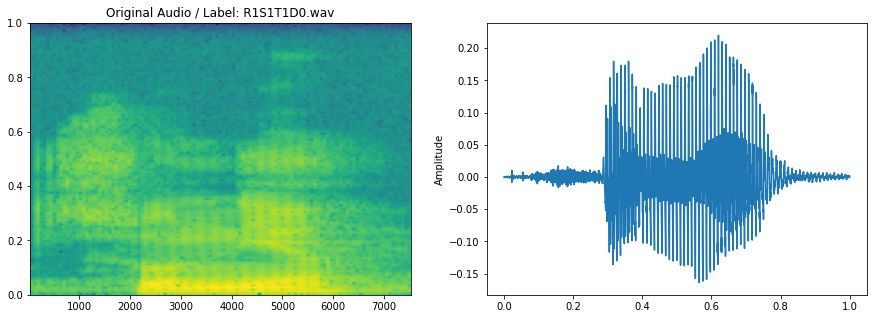

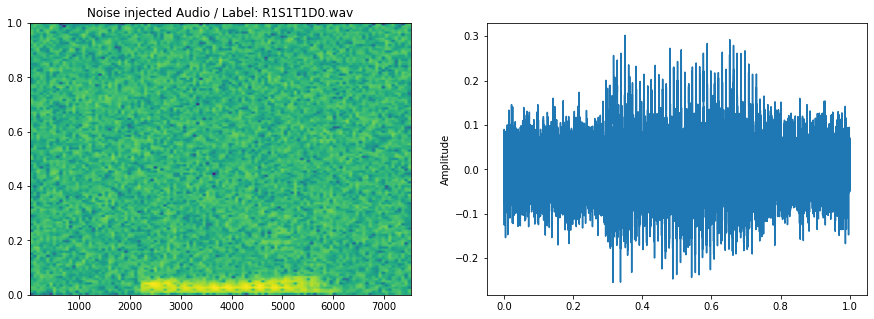

In [29]:
# Noise injection testing

filepath = '/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav'
# original audio
signal, sr = librosa.load(filepath)

# noised audio
noised,sr2 = noise_injection(filepath)


"""plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
librosa.display.waveplot(signal.astype('float'), sr=sr,x_axis=None)
plt.title('original')
plt.subplot(2, 1, 2)
librosa.display.waveplot(noised.astype('float'), sr=sr2,x_axis=None)
plt.title('Noised')
plt.show()"""

plot_spec(data=signal,sr=sr,title=f'Original Audio',fpath=filepath)
plot_spec(data=noised,sr=sr2,title=f'Noise injected Audio',fpath=filepath)

import IPython
print("\n--- Noised Audio ---\n")
IPython.display.Audio(data=noised, rate=sr2)



### 2. Shift Time

References:
1.   https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47

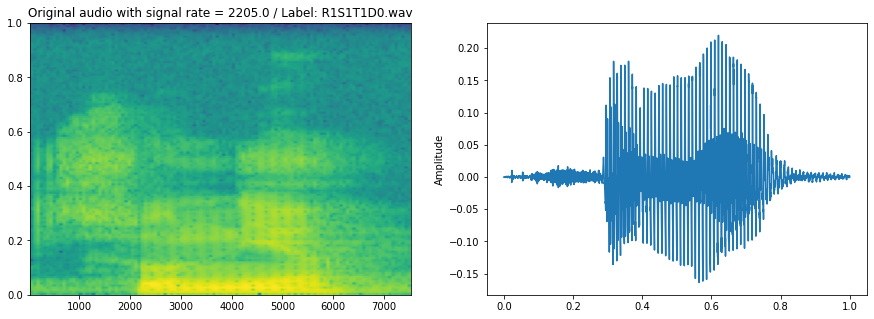

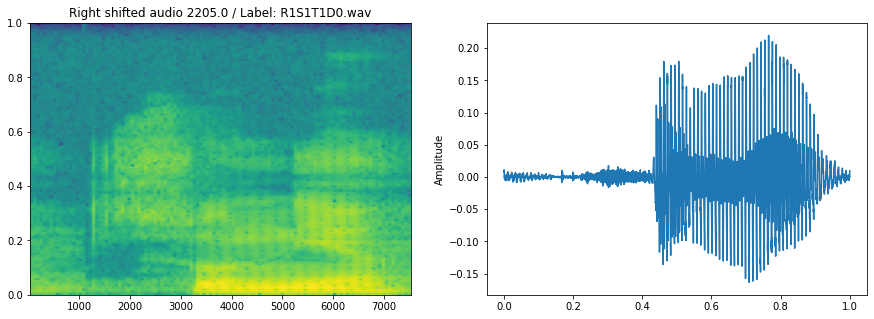

In [23]:
filepath = '/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav'
# original audio
signal, sr = librosa.load(filepath)
plot_spec(data=signal,sr=sr,title=f'Original audio with signal rate = {sr/10}',fpath=filepath)

wav_roll = np.roll(signal,int(sr/10))
plot_spec(data=wav_roll,sr=sr,title=f'Right shifted audio {sr/10}',fpath=filepath)
IPython.display.Audio(wav_roll,rate=sr)

### 3. Time Stretching

References:


1.   https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47



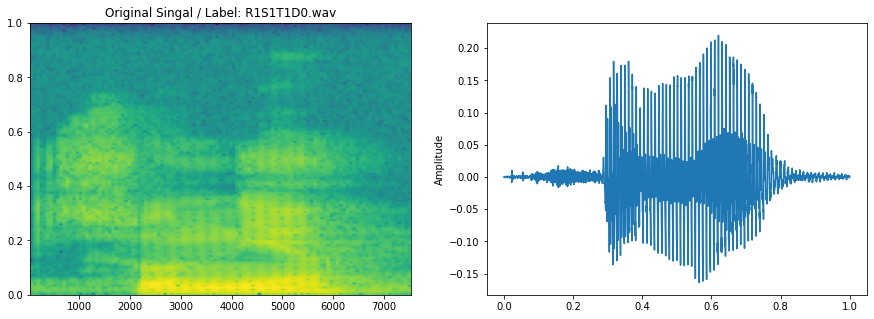

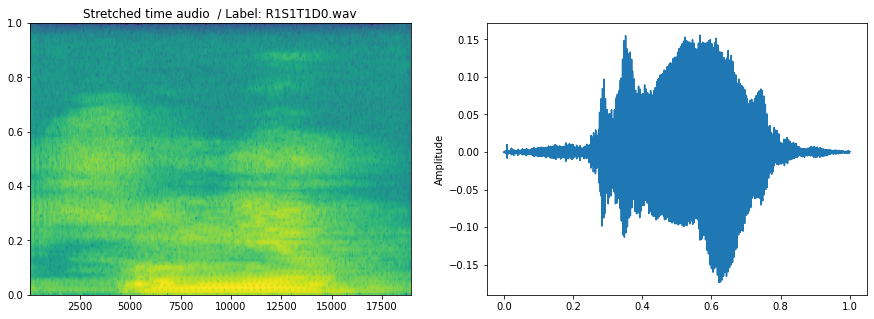

In [25]:
def stretch_time(signal, factor=0.4):
  """
    Function to stretch the time of the given signal by a factor.
  """
  stretched = librosa.effects.time_stretch(signal,factor)
  return stretched

filepath = '/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav'
# original audio
signal, sr = librosa.load(filepath)

plot_spec(data=signal,sr=sr,title=f'Original Singal',fpath=filepath)

stretched = stretch_time(signal)
plot_spec(data=stretched,sr=sr,title=f'Stretched time audio ',fpath=filepath)

IPython.display.Audio(stretched,rate=sr)

### 4. Pitch Shifting

References:


1.   https://medium.com/@keur.plkar/audio-data-augmentation-in-python-a91600613e47


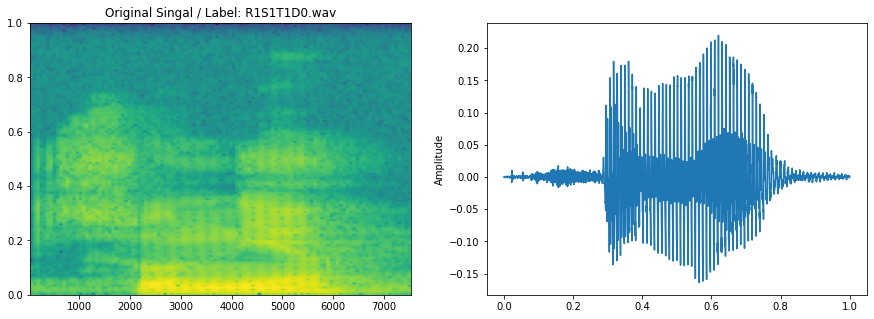

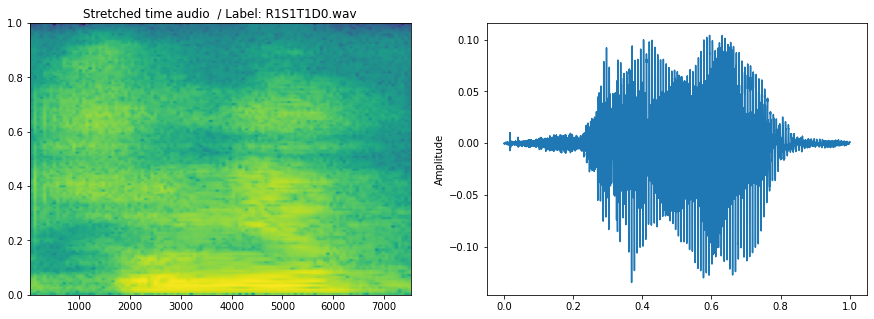

In [27]:
def shift_pitch(signal, n_steps = -5):
  """"
    Shift the pitch of given signal by no of given steps.
  """
  pitch_shifted = librosa.effects.pitch_shift(signal,sr,n_steps)
  return pitch_shifted

filepath = '/content/free-spoken-gujarati-digit-dataset/R1/S1/R1S1T1D0.wav'
# original audio
signal, sr = librosa.load(filepath)

plot_spec(data=signal,sr=sr,title=f'Original Singal',fpath=filepath)

stretched = shift_pitch(signal, 5)
plot_spec(data=stretched,sr=sr,title=f'Stretched time audio ',fpath=filepath)

IPython.display.Audio(stretched,rate=sr)